## Dataset Information

Investors are considering making an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! While JetRail has mastered the technology and they hold the patent for their product, the investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months.
 
You need to help Unicorn ventures with the decision. They usually invest in B2C start-ups less than 4 years old looking for pre-series A funding. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months.

## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from prophet import Prophet

In [ ]:
# !pip install fbprophet
# install visual c++ - visual studio
# if you face errors - use conda install

## Loading the dataset

In [2]:
df = pd.read_csv('Traffic data.csv')
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [3]:
df

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


## Preprocessing the dataset

In [4]:
# check null values
df.isnull().sum()

ID          0
Datetime    0
Count       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [6]:
# convert object to datetime datatype
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        18288 non-null  int64         
 1   Datetime  18288 non-null  datetime64[ns]
 2   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB


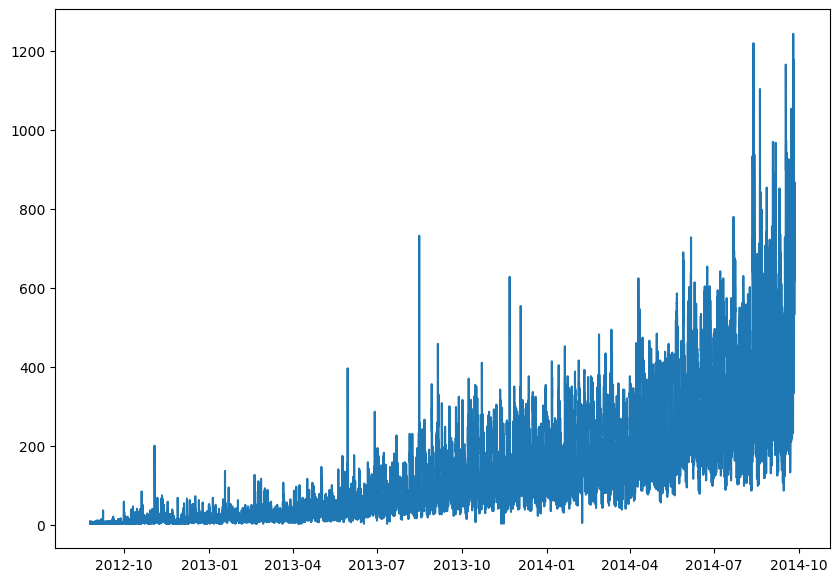

In [7]:
# EDA
plt.figure(figsize=(10,7))
plt.plot(df['Datetime'], df['Count'])
plt.show()

## Format data for the model

In [8]:
df.index = df['Datetime']
df['y'] = df['Count']
df.drop(columns=['ID', 'Datetime', 'Count'], axis=1, inplace=True)
df = df.resample('D').sum()
df.head()

,y
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60


In [9]:
df['ds'] = df.index
df.head()

,y,ds
Datetime,,
2012-08-25,76,2012-08-25
2012-08-26,88,2012-08-26
2012-08-27,62,2012-08-27
2012-08-28,58,2012-08-28
2012-08-29,60,2012-08-29


## Input Split

In [10]:
size = 60
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=size/len(df), shuffle=False)

In [11]:
train.tail()

,y,ds
Datetime,,
2014-07-23,10130,2014-07-23
2014-07-24,8156,2014-07-24
2014-07-25,7192,2014-07-25
2014-07-26,6562,2014-07-26
2014-07-27,6094,2014-07-27


In [12]:
test.head()

,y,ds
Datetime,,
2014-07-28,8546,2014-07-28
2014-07-29,8218,2014-07-29
2014-07-30,8498,2014-07-30
2014-07-31,8740,2014-07-31
2014-08-01,9186,2014-08-01


In [13]:
test.tail()

,y,ds
Datetime,,
2014-09-21,9102,2014-09-21
2014-09-22,14116,2014-09-22
2014-09-23,13304,2014-09-23
2014-09-24,16856,2014-09-24
2014-09-25,14152,2014-09-25


## Model Training

In [14]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(train)

15:40:09 - cmdstanpy - INFO - Chain [1] start processing
15:40:10 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future = model.make_future_dataframe(periods=60)
future

,ds
0,2012-08-25
1,2012-08-26
2,2012-08-27
3,2012-08-28
4,2012-08-29
...,...
757,2014-09-21
758,2014-09-22
759,2014-09-23
760,2014-09-24


In [16]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-480.515904,-1800.468024,135.558258,-480.515904,-480.515904,-339.836147,-339.836147,-339.836147,-846.227366,-846.227366,-846.227366,506.391219,506.391219,506.391219,0.0,0.0,0.0,-820.352051
1,2012-08-26,-473.499734,-1952.238484,-19.356700,-473.499734,-473.499734,-455.691605,-455.691605,-455.691605,-967.201147,-967.201147,-967.201147,511.509542,511.509542,511.509542,0.0,0.0,0.0,-929.191339
2,2012-08-27,-466.483563,-471.961536,1441.011480,-466.483563,-466.483563,946.361972,946.361972,946.361972,431.222220,431.222220,431.222220,515.139753,515.139753,515.139753,0.0,0.0,0.0,479.878409
3,2012-08-28,-459.467393,-372.649437,1466.853720,-459.467393,-459.467393,956.982822,956.982822,956.982822,439.586313,439.586313,439.586313,517.396509,517.396509,517.396509,0.0,0.0,0.0,497.515429
4,2012-08-29,-452.451222,-531.685156,1380.301771,-452.451222,-452.451222,918.180536,918.180536,918.180536,399.779405,399.779405,399.779405,518.401131,518.401131,518.401131,0.0,0.0,0.0,465.729313


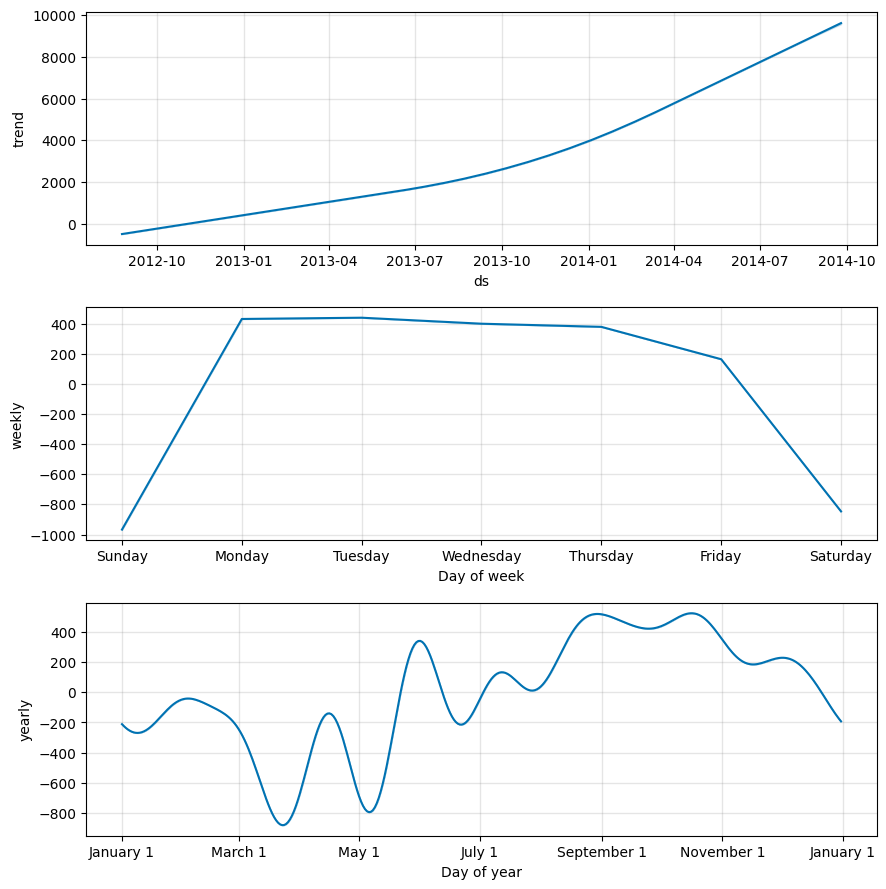

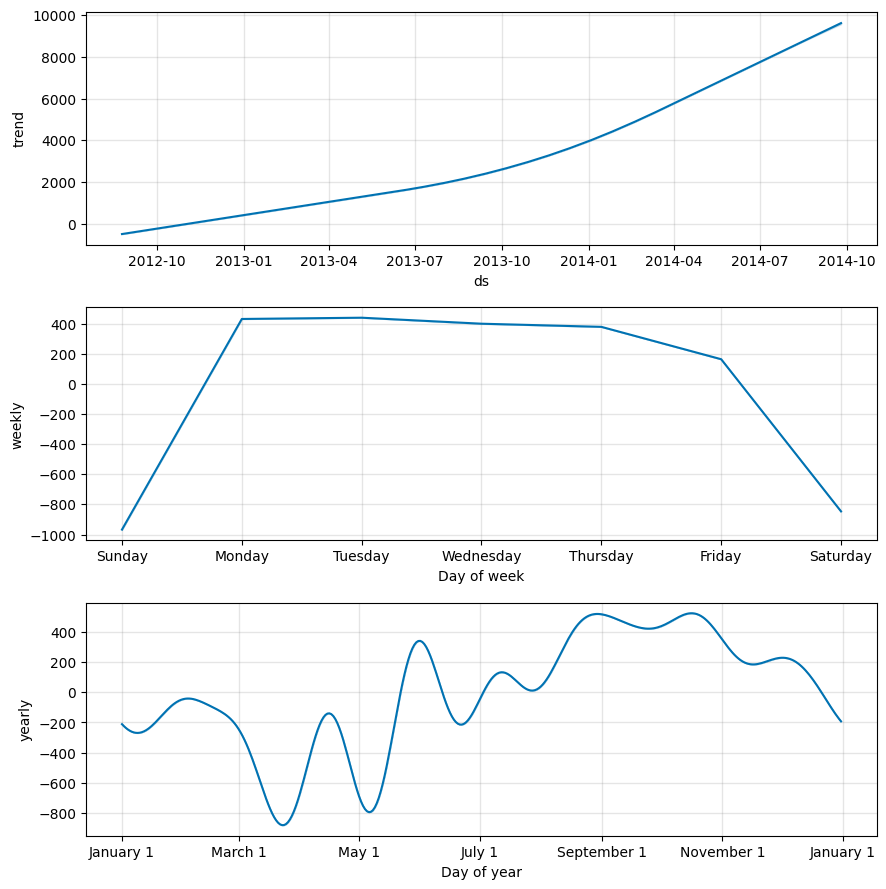

In [17]:
model.plot_components(forecast)

In [18]:
pred = forecast.iloc[-60:, :]
len(pred)

60

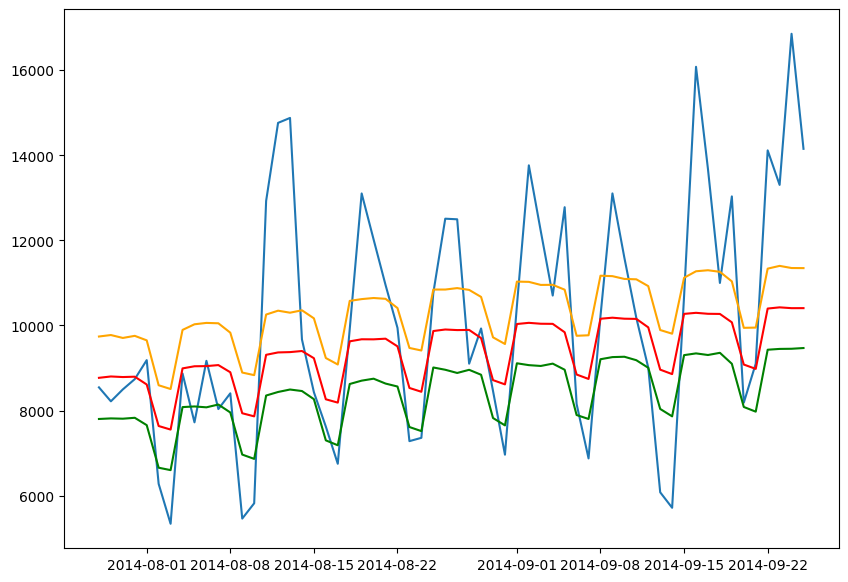

In [19]:
# test results
plt.figure(figsize=(10,7))
plt.plot(test['ds'], test['y'])
plt.plot(pred['ds'], pred['yhat'], color='red')
plt.plot(pred['ds'], pred['yhat_lower'], color='green')
plt.plot(pred['ds'], pred['yhat_upper'], color='orange')
plt.show()

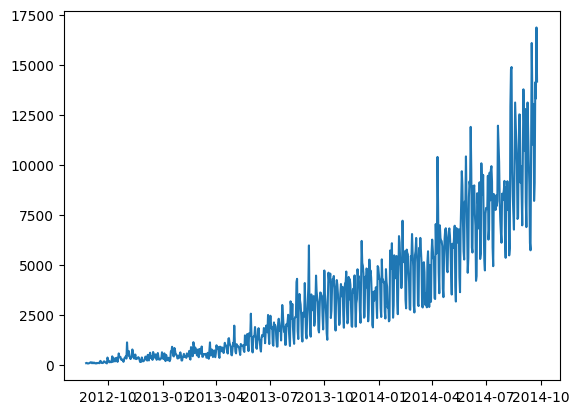

In [20]:
# input data
plt.plot(df['ds'], df['y'])
plt.show()

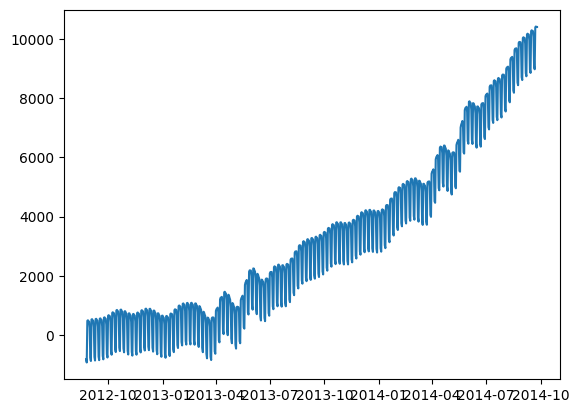

In [21]:
# forecast data
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()

In [22]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(df)
future = model.make_future_dataframe(periods=200)
forecast = model.predict(future)
forecast.head()

15:41:00 - cmdstanpy - INFO - Chain [1] start processing
15:41:00 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-685.504865,-2384.150018,95.274816,-685.504865,-685.504865,-425.089296,-425.089296,-425.089296,-995.182596,-995.182596,-995.182596,570.093300,570.093300,570.093300,0.0,0.0,0.0,-1110.594161
1,2012-08-26,-677.403154,-2382.981279,-5.918918,-677.403154,-677.403154,-583.195547,-583.195547,-583.195547,-1144.260744,-1144.260744,-1144.260744,561.065197,561.065197,561.065197,0.0,0.0,0.0,-1260.598700
2,2012-08-27,-669.301442,-832.195576,1545.876460,-669.301442,-669.301442,1006.775997,1006.775997,1006.775997,457.603195,457.603195,457.603195,549.172803,549.172803,549.172803,0.0,0.0,0.0,337.474555
3,2012-08-28,-661.199731,-687.202106,1691.300493,-661.199731,-661.199731,1143.613447,1143.613447,1143.613447,608.386428,608.386428,608.386428,535.227019,535.227019,535.227019,0.0,0.0,0.0,482.413716
4,2012-08-29,-653.098020,-795.623500,1683.656821,-653.098020,-653.098020,1076.976920,1076.976920,1076.976920,556.919163,556.919163,556.919163,520.057757,520.057757,520.057757,0.0,0.0,0.0,423.878900


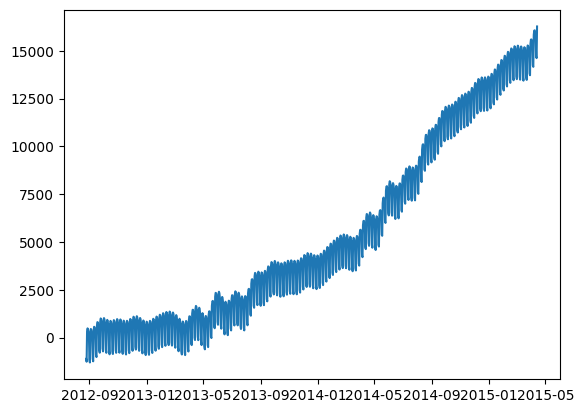

In [23]:
# forecast data
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()